In [114]:
%run "./fun.py"

In [115]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

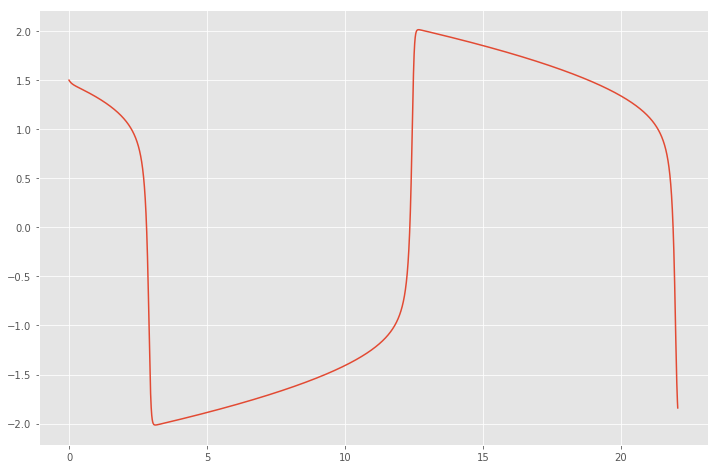

number of steps =  24424


In [104]:
vdp = adaptive_step_solver(cappa=1, scheme='rk4', Ut=Ut_vdp, L=100, u0=[1.5,-0.5], w_=1, sigma_=10)

#Lambda = adaptive_step_solver(Ut=Ut_lambda, scheme='rk4', L=20, u0=0, lambda0=1e3, cappa=1, a_=3.14)

T, U, H = vdp.step_solve(h0=0.005, step_type='auto', return_list=['T','U', 'H'])

plt.plot(T,U[:,0])
plt.show()
print 'number of steps = ', U.shape[0]

## Первый этап

In [116]:
fun = adaptive_step_solver(cappa=1, scheme='rk4', Ut=Ut_vdp, L=100, u0=[1.5,-0.5], w_=1, sigma_=10)
#fun = adaptive_step_solver(Ut=Ut_lambda, scheme='rk4', L=20, u0=0, lambda0=1e3, cappa=1, a_=3.14)

In [117]:
H_, U_, T_ = fun.first_stage()

1 0.588999299096
2 1.13142225269
3 0.514632672293
4 0.112618555327
5 0.0145272961383


In [167]:
num = 7

U = [U_]
T = [T_]
H = [H_[:-1]]
N = [U_.shape[0]-1]

err_real = [None]
err = [None]
acc = [None, None]
acc_real = [None]
for k in xrange(1, num+1):

    #квазиравномерно сгущаем сетку
    H.append( dense_grid(H[k-1]) ) #H[k]
    
    #теперь считаем на новой сетке
    fun.step_solve(step_type='given', H=H[k])
    U.append(fun.get_results(['U'])[0]) # U[k]
    T.append(fun.get_results(['T'])[0]) # T[k]
    
    err.append(rich_error(fun, T[k], U[k], T[k-1], U[k-1], metrics='l2'))
    #err_real.append( real_err(fun, T[k], U[k], metrics='l2') )
     
    N.append( N[k-1]*2 )
    
    # оценка порядка
    if k>1:
        pass 
        acc.append( (np.log10(err[k]) - np.log10(err[k-1])) / (np.log10(N[k]) - np.log10(N[k-1])) ) 
        #acc[k] = np.sqrt((acc[k]**2).mean())
        acc[k] = acc[k][0]
            #acc_real.append( (np.log10(err_real[k]) - np.log10(err_real[k-1])) / (np.log10(n_[k]) - np.log10(n_[k-1])) ) 

    print k, acc[k] #':', rich_error(fun, T[k], U[k], T[k-1], U[k-1], metrics='l2'), ',',  acc[k-1

#брать среднее квадратичное от порядка точности или от ошибки?

1 None
2 -11.1278128947
3 -3.94831031548
4 -3.95329677357
5 -3.7571417874
6 -2.73161195155
7 2.29705937036


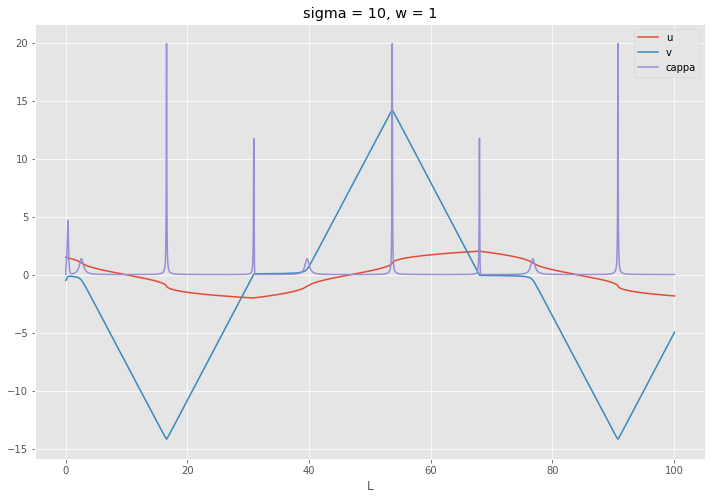

In [168]:
plt.plot(fun.getL(), fun.getU())
plt.plot(fun.getL(), fun.getCappa())

plt.legend(['u', 'v', 'cappa'])
plt.title('sigma = ' + str(fun.params['sigma_']) + ', w = ' + str(fun.params['w_']))
plt.xlabel('L')
plt.show()

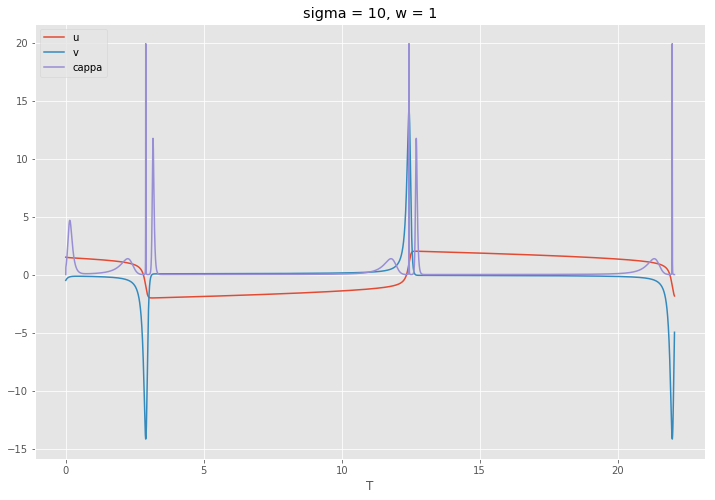

In [169]:
plt.plot(fun.getT(), fun.getU())
plt.plot(fun.getT(), fun.getCappa())
plt.legend(['u', 'v', 'cappa'])
plt.title('sigma = ' + str(fun.params['sigma_']) + ', w = ' + str(fun.params['w_']))
plt.xlabel('T')
plt.show()

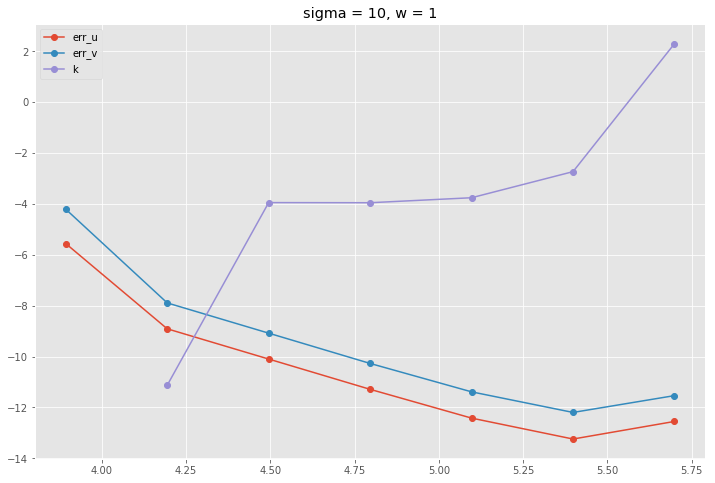

In [173]:
plt.title('sigma = ' + str(fun.params['sigma_']) + ', w = ' + str(fun.params['w_']))

plt.plot( np.log10(N[1:]), np.log10(err[1:]), marker='o')

plt.plot( np.log10(N), acc, marker='o')

plt.legend(['err_u', 'err_v', 'k'])

plt.show()

## Оценка погрешности

In [ ]:
err_real_C = np.zeros(num+1)
err_real_L = np.zeros(num+1)

err_est_C = np.zeros(num+1)
err_est_L = np.zeros(num+1)


err_est_C2 = np.zeros(num+1)
err_est_L2 = np.zeros(num+1)


for k in xrange(1,num+1):
    print k
    
    for s in xrange(N[k-1]):

        eT = (T[k][s*2] - T[k-1][s] ) / 15;
        eU = (U[k][s*2] - U[k-1][s] ) / 15;
        #eV = (U[k][s*2][1] - U[k-1][s][1] ) / 15;
        
        e1 = abs(eU - eT*fun.Ut( T[k][s*2], U[k][s*2], fun.params)[0] )
        #e2 = abs(eV - eT*fun.Ut( T[k][s*2], U[k][s*2], fun.params)[1] )
        
        
        err_est_C[k] = np.max([err_est_C[k], e1])
        err_est_L[k] += e1**2
        
        err_est_C2[k] = np.max([err_est_C[k], e2])
        err_est_L2[k] += e2**2
        
    err_est_L[k] = np.sqrt(err_est_L[k] / N[k-1])
    err_est_L2[k] = np.sqrt(err_est_L2[k] / N[k-1])
    
#     for s in xrange(N[k]):
        
#         e1 = abs(U[k][s] - U_real(T[k][s], fun.params))
#         err_real_C[k] = np.max([err_real_C[k], e1])
#         err_real_L[k] += e1**2
        
#     err_real_L[k] = np.sqrt(err_real_L[k] / N[k])

    
acc = np.zeros(num)
for i in xrange(1,num):
    acc[i] = (np.log10(err_est_L[i+1]) - np.log10(err_est_L[i])) / (np.log10(N[i+1]) - np.log10(N[i]))

In [ ]:
# plt.plot(np.log10(N[1:]), np.log10(err_real_C[1:]), marker='o', linewidth=1)
# plt.plot(np.log10(N[1:]), np.log10(err_real_L[1:]), marker='o', linewidth=1)


plt.plot(np.log10(N[1:]), np.log10(err_est_C[1:]), marker='o', linewidth=1)
plt.plot(np.log10(N[1:]), np.log10(err_est_L[1:]), marker='o', linewidth=1)

plt.plot(np.log10(N[1:]), np.log10(err_est_C2[1:]), marker='o', linewidth=1)
plt.plot(np.log10(N[1:]), np.log10(err_est_L2[1:]), marker='o', linewidth=1)


plt.plot(np.log10(N[1:]), acc, marker='o', linewidth=1)


plt.legend(['err_est_C', 'err_est_L', 'err_est_C2', 'err_est_L2'])
plt.show()

In [125]:
def real_err(fun, t, u, metrics='l2'):
    
    err_real_L = 0
    err_real_C = 0
    
    for s in xrange(u.shape[0]):
        
        e1 = abs(u[s] - U_real(t[s], fun.params))
        err_real_C = np.max([err_real_C, e1])
        err_real_L += e1**2
        
    err_real_L = np.sqrt(err_real_L / u.shape[0])
    
    
    if metrics == 'l2':
        return err_real_L
    
    elif metrics == 'c':
        return err_real_C
    

In [ ]:
fun.

In [63]:
None != None

False